

# ---SUPPORT VECTOR MACHINE



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df =sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.drop(["class","embarked","alive"],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


In [ ]:
df.drop("deck",axis=1,inplace=True)

In [ ]:
df.dropna(subset=["embark_town"],inplace=True)

<Axes: >

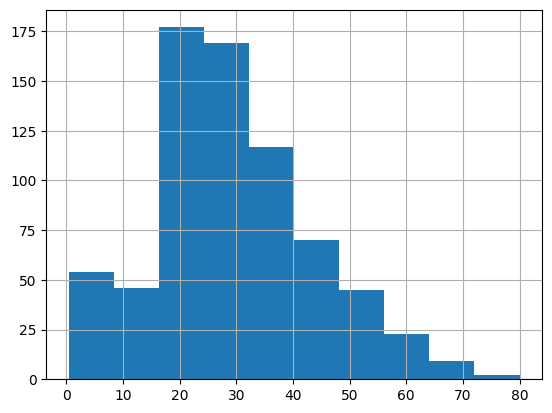

In [ ]:
df["age"].hist()

In [ ]:
df["age"].fillna(df["age"].median(),inplace=True)

/tmp/ipython-input-2039613669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(),inplace=True)


In [ ]:
df["age"].fillna(df["age"].median(),inplace=True)

/tmp/ipython-input-2039613669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(),inplace=True)


In [ ]:
df["embark_town"].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [ ]:
df.duplicated().sum()

np.int64(116)

In [ ]:
df.shape

(889, 11)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(773, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df[sex]=le.fit_transform(df["sex"])

df['who'] = le.fit_transform(df['who'])
df['adult_male']=le.fit_transform(df['adult_male'])
df['alone']=le.fit_transform(df['alone'])
df['embark_town']=le.fit_transform(df['embark_town'])

In [ ]:
df["sex"].isnull().sum()

np.int64(0)

In [ ]:
dummies=pd.get_dummies(df["sex"]).astype(int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
887,1,0
888,1,0
889,0,1


In [ ]:
df=pd.concat([df,dummies],axis="columns")
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,female,male
0,0,3,male,22.0,1,0,7.2500,1,1,2,0,0,1
1,1,1,female,38.0,1,0,71.2833,2,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,2,0,2,1,1,0
3,1,1,female,35.0,1,0,53.1000,2,0,2,0,1,0
4,0,3,male,35.0,0,0,8.0500,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,2,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,2,0,2,1,1,0
888,0,3,female,28.0,1,2,23.4500,2,0,2,0,1,0
889,1,1,male,26.0,0,0,30.0000,1,1,0,1,0,1


In [ ]:
df.drop(["sex"],axis="columns",inplace=True)

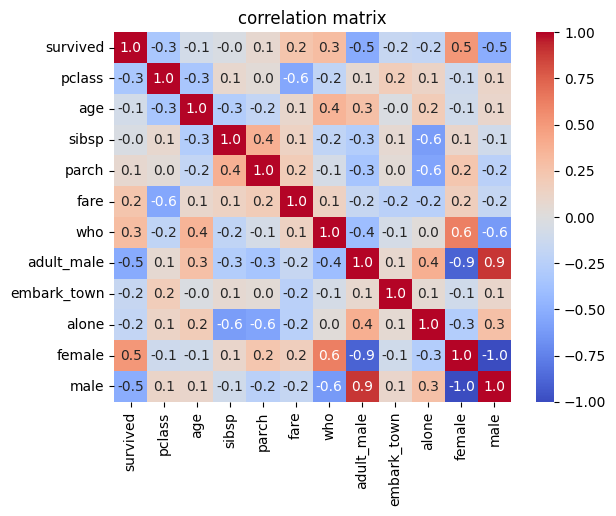

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True, fmt="0.01f",cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

In [ ]:
df.drop(["male","female"],axis=1,inplace=True)

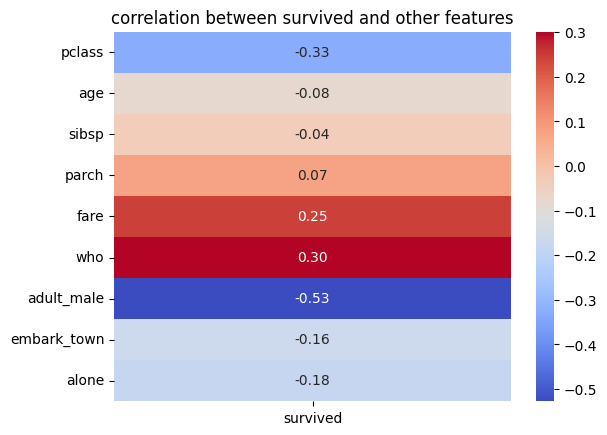

In [ ]:

survived_corr = df.corr()["survived"]
survived_corr =survived_corr.drop("survived")
sns.heatmap(survived_corr.to_frame(),annot=True,fmt=".2f",cmap="coolwarm",
            cbar=True,annot_kws={"size":10 })
plt.title("correlation between survived and other features")
plt.show()

In [ ]:
df.drop(["age","sibsp","parch"],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X = df[['pclass', 'fare', 'embark_town',"pclass","who","adult_male","alone"]]
y = df['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
model=SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)
model.predict(X_test)



array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.61


In [ ]:
svclassifier = SVC(kernel="linear")
svclassifier.fit(xtrain, ytrain)
svclassifier.score(xtest, ytest)


0.7783505154639175

In [ ]:
svclassifier_2 = SVC(kernel='poly', degree=8)
svclassifier_2.fit(xtrain, ytrain)
svclassifier_2.score(xtest, ytest)


0.634020618556701

In [ ]:
Gau_fier = SVC(kernel ='rbf', random_state = 0)
Gau_fier.fit(xtrain, ytrain)
Gau_fier.score(xtest, ytest)


0.6649484536082474

In [ ]:
sig_fier = SVC(kernel ='sigmoid')
sig_fier.fit(xtrain, ytrain)
sig_fier.score(xtest, ytest)


0.5463917525773195

# **BENGALURU HOUSE DATA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Bengaluru_House_Data (1).csv")
df



,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.drop("society",axis=1,inplace=True)

In [ ]:
df.dropna(subset=["location","size"],inplace=True)

<Axes: >

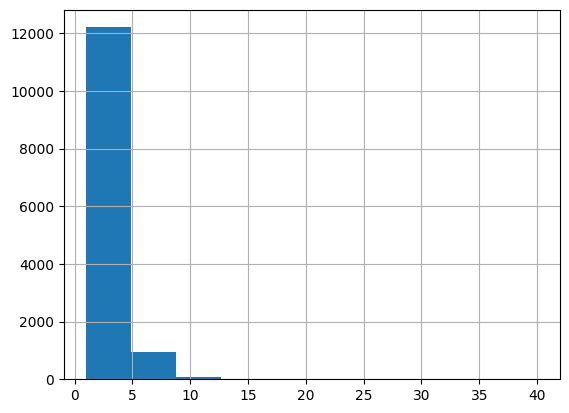

In [ ]:
df["bath"].hist()

In [ ]:
df["bath"].fillna(df["bath"].median(),inplace=True)

/tmp/ipython-input-657934831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bath"].fillna(df["bath"].median(),inplace=True)


<Axes: >

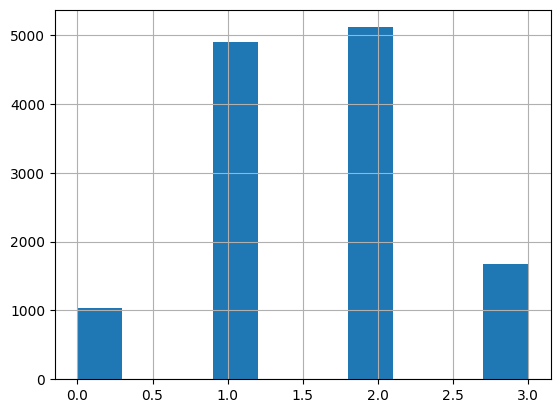

In [ ]:
df["balcony"].hist()

In [ ]:
df["balcony"].fillna(df["balcony"].mode()[0],inplace=True)


/tmp/ipython-input-3364117578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["balcony"].fillna(df["balcony"].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df.duplicated().sum()

np.int64(569)

In [ ]:
df.shape

(13303, 8)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape


(12734, 8)

# **correlation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12734 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12734 non-null  object 
 1   availability  12734 non-null  object 
 2   location      12734 non-null  object 
 3   size          12734 non-null  object 
 4   total_sqft    12734 non-null  object 
 5   bath          12734 non-null  float64
 6   balcony       12734 non-null  float64
 7   price         12734 non-null  float64
dtypes: float64(3), object(5)
memory usage: 895.4+ KB


In [ ]:
print(df["area_type"].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [ ]:
print(df["availability"].unique())

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb'
 '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov'
 '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov'
 '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul' '16-Sep' '15-Oct'
 '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan'
 '14-Jul']


In [ ]:
df["availability"] = pd.to_datetime(
    df["availability"] + "-2024",
    format="%d-%b-%Y",
    errors="coerce")

In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,2024-12-19,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,NaT,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,NaT,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,NaT,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,NaT,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,NaT,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,NaT,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,NaT,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,NaT,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [ ]:
df["availability"].fillna(df["availability"].median(),inplace=True)

/tmp/ipython-input-319720832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["availability"].fillna(df["availability"].median(),inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()



df['location']=le.fit_transform(df['location'])
df['area_type']=le.fit_transform(df["area_type"])

In [ ]:
print(df["size"].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [ ]:
import pandas as pd


def split_features(value):
    if 'BHK' in value:

        bedroom = int(value.split()[0])
        hall = 1
        kitchen = 1
    elif 'Bedroom' in value:

        bedroom = int(value.split()[0])
        hall = 0
        kitchen = 0
    elif value == '1 RK':
        bedroom = 1
        hall = 0
        kitchen = 1
    else:
        bedroom = None
        hall = None
        kitchen = None
    return bedroom, hall, kitchen


df[['Bedroom', 'Hall', 'Kitchen']] = df['size'].apply(lambda x: pd.Series(split_features(x)))

df

,area_type,availability,location,size,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen
0,3,2024-12-19,419,2 BHK,1056,2.0,1.0,39.07,2,1,1
1,2,2024-07-18,317,4 Bedroom,2600,5.0,3.0,120.00,4,0,0
2,0,2024-07-18,1178,3 BHK,1440,2.0,3.0,62.00,3,1,1
3,3,2024-07-18,756,3 BHK,1521,3.0,1.0,95.00,3,1,1
4,3,2024-07-18,715,2 BHK,1200,2.0,1.0,51.00,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13314,3,2024-07-18,474,3 BHK,1715,3.0,3.0,112.00,3,1,1
13315,0,2024-07-18,1251,5 Bedroom,3453,4.0,0.0,231.00,5,0,0
13316,3,2024-07-18,1003,4 BHK,3600,5.0,2.0,400.00,4,1,1
13317,0,2024-07-18,971,2 BHK,1141,2.0,1.0,60.00,2,1,1


In [ ]:
df.drop("size",axis=1,inplace=True)

In [ ]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12734 entries, 0 to 13318
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   area_type     12734 non-null  int64         
 1   availability  12734 non-null  datetime64[ns]
 2   location      12734 non-null  int64         
 3   total_sqft    12734 non-null  object        
 4   bath          12734 non-null  float64       
 5   balcony       12734 non-null  float64       
 6   price         12734 non-null  float64       
 7   Bedroom       12734 non-null  int64         
 8   Hall          12734 non-null  int64         
 9   Kitchen       12734 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
df["total_sqft"]=pd.to_numeric(df["total_sqft"],errors="coerce")

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
total_sqft,238
bath,0
balcony,0
price,0
Bedroom,0
Hall,0
Kitchen,0


<Axes: >

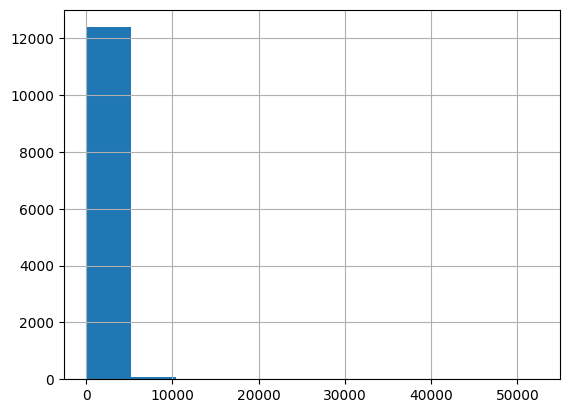

In [ ]:
df["total_sqft"].hist()

In [ ]:
df["total_sqft"].fillna(df["total_sqft"].median(),inplace=True)

/tmp/ipython-input-3681608186.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_sqft"].fillna(df["total_sqft"].median(),inplace=True)


In [ ]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen
0,3,2024-12-19,419,1056.0,2.0,1.0,39.07,2,1,1
1,2,2024-07-18,317,2600.0,5.0,3.0,120.00,4,0,0
2,0,2024-07-18,1178,1440.0,2.0,3.0,62.00,3,1,1
3,3,2024-07-18,756,1521.0,3.0,1.0,95.00,3,1,1
4,3,2024-07-18,715,1200.0,2.0,1.0,51.00,2,1,1
...,...,...,...,...,...,...,...,...,...,...
13314,3,2024-07-18,474,1715.0,3.0,3.0,112.00,3,1,1
13315,0,2024-07-18,1251,3453.0,4.0,0.0,231.00,5,0,0
13316,3,2024-07-18,1003,3600.0,5.0,2.0,400.00,4,1,1
13317,0,2024-07-18,971,1141.0,2.0,1.0,60.00,2,1,1


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
Bedroom,0
Hall,0
Kitchen,0


# **correlation matrix**

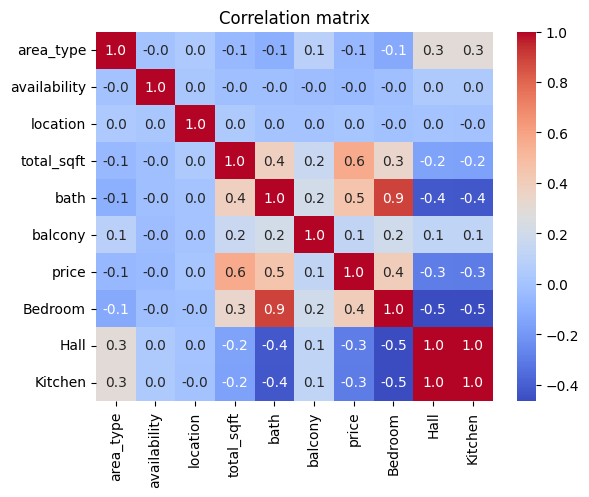

In [ ]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True, fmt="0.01f",cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [ ]:
df.drop(["Kitchen","bath"],axis=1,inplace=True, errors='ignore')

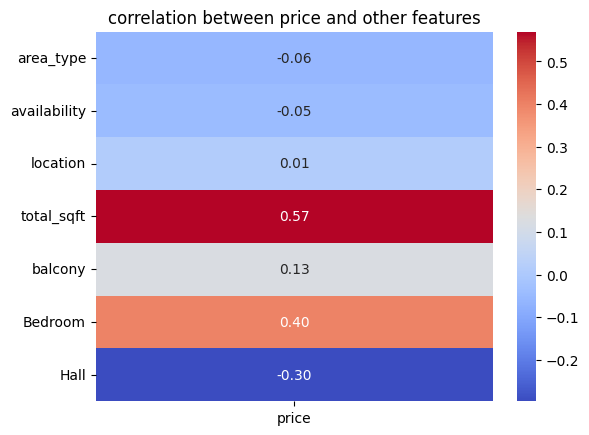

In [ ]:

price_corr = df.corr()["price"]
price_corr =price_corr.drop("price")
sns.heatmap(price_corr.to_frame(),annot=True,fmt=".2f",cmap="coolwarm",
            cbar=True,annot_kws={"size":10 })# to_frame() converts Series to DataFrame for heatmap
plt.title("correlation between price and other features")
plt.show()

In [ ]:
df.drop('location',axis=1,inplace=True)
df.drop('availability',axis=1,inplace=True)

In [ ]:
df1=df.head(1000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.svm import SVR


X = df1[["area_type","total_sqft","balcony","Hall","Bedroom"]]
y = df1["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model=SVR()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.06339741427327694

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


X = df1[["area_type","total_sqft","balcony","Hall","Bedroom"]]
y = df1["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svregressor = SVR(kernel="linear")
svregressor.fit(X_train,y_train)
svregressor.score(X_train,y_train)

0.4469937161263954

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split




X = df1[["area_type","total_sqft","balcony","Hall","Bedroom"]]
y = df1["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
Gau_fier = SVR(kernel ='rbf')
Gau_fier.fit(X_train,y_train)
Gau_fier.score(X_train,y_train)

0.14520128049139347